In [2]:
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import cv2

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [12]:
cap = cv2.VideoCapture(0)
hands = mp_hands.Hands(static_image_mode=False , max_num_hands = 2 , min_detection_confidence=0.7, min_tracking_confidence=0.5)

while cap.isOpened():
    success, img = cap.read()
    if not success:
        print("read fail")
        continue
        
    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = hands.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks is not None:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    cv2.imshow("test" , img)
    if cv2.waitKey(5)==27:
        break
        
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()


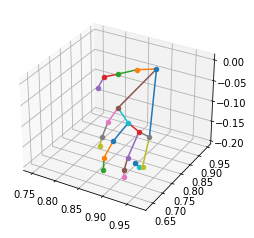

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
for landmark in hand_landmarks.landmark:
    #print(landmark.x, landmark.y, landmark.z)
    ax.scatter(landmark.x, landmark.y, landmark.z , marker='o')

point1 = [17,0,1,2,3,0,5,6,7,5,9,10,11,9,13,14,15,13,17,18,19]
point2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for p2 in point2:
    landmark_0 = hand_landmarks.landmark[point1[p2]]
    landmark_1 = hand_landmarks.landmark[p2]
    xs = [landmark_0.x, landmark_1.x]
    ys = [landmark_0.y, landmark_1.y]
    zs = [landmark_0.z, landmark_1.z]
    ax.plot(xs, ys, zs)

    
plt.show()

In [26]:
#gesture classifaction: simple method
file_name = "hand_example.jpg"
img = cv2.imread(file_name)
img = cv2.flip(img, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hands = mp_hands.Hands(static_image_mode=True , max_num_hands = 2 , min_detection_confidence=0.5)
results = hands.process(img)

In [27]:
print(results.multi_handedness)

[classification {
  index: 0
  score: 1.0
  label: "Left"
}
]


In [28]:
print(results.multi_hand_landmarks)

[landmark {
  x: 0.5883724093437195
  y: 0.600513756275177
  z: -0.000110394146759063
}
landmark {
  x: 0.5964284539222717
  y: 0.4884115755558014
  z: -0.03624233976006508
}
landmark {
  x: 0.5781431198120117
  y: 0.38453158736228943
  z: -0.0748046487569809
}
landmark {
  x: 0.5291162729263306
  y: 0.3363705575466156
  z: -0.11463189870119095
}
landmark {
  x: 0.4888070821762085
  y: 0.37840044498443604
  z: -0.13403581082820892
}
landmark {
  x: 0.5029683709144592
  y: 0.39451998472213745
  z: -0.012892842292785645
}
landmark {
  x: 0.46870309114456177
  y: 0.33749064803123474
  z: -0.04852629080414772
}
landmark {
  x: 0.5144006013870239
  y: 0.38258984684944153
  z: -0.034431178122758865
}
landmark {
  x: 0.5277401804924011
  y: 0.41310790181159973
  z: -0.008139082230627537
}
landmark {
  x: 0.48374348878860474
  y: 0.44325101375579834
  z: -0.021881410852074623
}
landmark {
  x: 0.44918763637542725
  y: 0.39258110523223877
  z: -0.09561044722795486
}
landmark {
  x: 0.5091753602

In [31]:
hand_landmarks = results.multi_hand_landmarks[0]
index_finger_tip_y = hand_landmarks.landmark[8].y
index_finger_up = True
for landmark in hand_landmarks.landmark:
    if index_finger_tip_y > landmark.y:
        index_finger_up = False
        break
if index_finger_up == True:
    print("index finger up")
else:
    print("index finger down")

index finger down


In [32]:
def is_index_finger_up(hand_landmarks):
    index_finger_tip_y = hand_landmarks.landmark[8].y
    index_finger_up = True
    for landmark in hand_landmarks.landmark:
        if index_finger_tip_y > landmark.y:
            index_finger_up = False
            break
    if index_finger_up == True:
        print("index finger up")
    else:
        print("index finger down")
    return index_finger_up

In [33]:
is_index_finger_up(hand_landmarks)

index finger down


False

In [41]:
cap = cv2.VideoCapture(0)
hands = mp_hands.Hands(static_image_mode=False , max_num_hands = 2 , min_detection_confidence=0.7, min_tracking_confidence=0.5)

while cap.isOpened():
    success, img = cap.read()
    if not success:
        print("read fail")
        continue
        
    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = hands.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks is not None:
        hand_landmarks = results.multi_hand_landmarks[0]
        clear_output(wait=True)
        is_index_finger_up(hand_landmarks)
        
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    cv2.imshow("test" , img)
    if cv2.waitKey(5)==27:
        break
        
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()


index finger down


In [35]:
from IPython.display import clear_output

In [38]:
print("a")
clear_output(wait=True)
print("b")

b


In [42]:
def is_fingers_up(hand_landmarks):
    finger_landmarks_list = [[6,8],[10,12],[14,16],[18,20]]
    results = []
    for finger_landmarks in finger_landmarks_list:
        finger_pip_idx, finger_tip_idx = finger_landmarks
        finger_tip_y = hand_landmarks.landmark[finger_tip_idx].y
        finger_pip_y = hand_landmarks.landmark[finger_pip_idx].y
        finger_up = finger_tip_y < finger_pip_y
        results.append(finger_up)
        
    return results

In [43]:
is_fingers_up(hand_landmarks)

[False, False, False, True]

In [51]:
def count_fingers(hand_landmarks):
    finger_results = is_fingers_up(hand_landmarks)
    if finger_results[0]:
        if finger_results[1]:
            if finger_results[2]:
                print(3)
            else:
                print(2)
        else:
            print(1)
    else:
        print(0)

In [ ]:
# HW
# thumb up & down

In [53]:
cap = cv2.VideoCapture(0)
hands = mp_hands.Hands(static_image_mode=False , max_num_hands = 2 , min_detection_confidence=0.7, min_tracking_confidence=0.5)

while cap.isOpened():
    success, img = cap.read()
    if not success:
        print("read fail")
        continue
        
    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = hands.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks is not None:
        hand_landmarks = results.multi_hand_landmarks[0]
        clear_output(wait=True)
#        is_index_finger_up(hand_landmarks)
        count_fingers(hand_landmarks)
        
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    cv2.imshow("test" , img)
    if cv2.waitKey(5)==27:
        break
        
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()


1


In [54]:
# -----HW-----
# 1) one
# 2) two
# 3) three
# 4) thumb up
# 5) thumb down
# 6) hands up (fist)

In [55]:
# dataset
import pickle

In [56]:
a = 10

In [57]:
with open("a.pkl", "wb")as f:
    pickle.dump(a,f)

In [58]:
with open("a.pkl","rb") as f:
    b = pickle.load(f)

In [59]:
print(b)

10


In [60]:
cv2.imshow("test" , img)
key_value=cv2.waitKey()
print(key_value)
cv2.destroyAllWindows()
cv2.waitKey(1)
# key_value= = 49 -> "1"
# key_value= = 50 -> "2"
# key_value= = 51 -> "3"
# key_value= = 52 -> "4"
# key_value= = 53 -> "5"
# key_value= = 54 -> "6"

49


-1

In [61]:
dataset=[]

cap = cv2.VideoCapture(0)
hands = mp_hands.Hands(static_image_mode=False , max_num_hands = 2 , min_detection_confidence=0.7, min_tracking_confidence=0.5)

while cap.isOpened():
    success, img = cap.read()
    if not success:
        print("read fail")
        continue
        
    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = hands.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks is not None:
        hand_landmarks = results.multi_hand_landmarks[0]
        clear_output(wait=True)
        
        
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    cv2.imshow("test" , img)
    key_value = cv2.waitKey(5)
    
    if key_value==49:
        data_pair = [hand_landmarks, 0]
        dataset.append(data_pair)
    elif key_value==50:
        data_pair = [hand_landmarks, 1]
        dataset.append(data_pair)
    elif key_value==51:
        data_pair = [hand_landmarks, 2]
        dataset.append(data_pair)
    elif key_value==52:
        data_pair = [hand_landmarks, 3]
        dataset.append(data_pair)
    elif key_value==53:
        data_pair = [hand_landmarks, 4]
        dataset.append(data_pair)
    elif key_value==54:
        data_pair = [hand_landmarks, 5]
        dataset.append(data_pair)
    elif key_value==27:
        break
        
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()


In [63]:
print(len(dataset))

6


In [64]:
with open("dataset.pkl", "wb")as f:
    pickle.dump(dataset,f)

In [65]:
# HW Make Dataset with 10+ per hand position

In [66]:
# extra: k-Nearest Neighbours

In [67]:
# finding angle
file_name = "hand_example.jpg"
img = cv2.imread(file_name)
img = cv2.flip(img,1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [68]:
hands = mp_hands.Hands(static_image_mode=True , max_num_hands = 2 , min_detection_confidence=0.5)
results = hands.process(img)

In [72]:
hand_landmarks = results.multi_hand_landmarks[0]

point_0 = np.array([hand_landmarks.landmark[0].x, hand_landmarks.landmark[0].y, hand_landmarks.landmark[0].z])
point_1 = np.array([hand_landmarks.landmark[1].x, hand_landmarks.landmark[1].y, hand_landmarks.landmark[1].z])
point_2 = np.array([hand_landmarks.landmark[2].x, hand_landmarks.landmark[2].y, hand_landmarks.landmark[2].z])
print(point_0, point_1, point_2)

[ 5.88372409e-01  6.00513756e-01 -1.10394147e-04] [ 0.59642845  0.48841158 -0.03624234] [ 0.57814312  0.38453159 -0.07480465]


In [77]:
vector_1 = point_0 - point_1
vector_2 = point_2 - point_1
inner_product_result = np.dot(vector_1,vector_2)
cos_theta = inner_product_result/(np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
theta = np.arccos(cos_theta)
degree = theta*180/np.pi
print(degree)

166.48478780458362
